In [3]:
import pandas as pd
import numpy as np

### основа представление в таблич данные
<img src="https://pandas.pydata.org/docs/_images/01_table_dataframe.svg">



### series - одномерный масив/объект (содержит масив данных, строка)
### data frame - таблица
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/01_table_series.svg">

In [4]:
obj = pd.Series()
obj# ? # интроспекция,покказывает сигнатру объекта 

Series([], dtype: object)

In [5]:
obj = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'], dtype='int8')

obj.nbytes, obj.dtype
# 1d - одномерный массив 
# если разнные типы данных приводит к одному типу 

(4, dtype('int8'))

In [6]:
obj['b'] = 5
# dir(obj)
obj.isna() # проверка на Null/None
obj.notna() # 

data = {'maxim': [1, 2, 3], 'fave': ['name', 'age', 'data']}
obj = pd.DataFrame(data) # упорядоч колекци столбц     
obj.head(1) # сигнатура объекта -> .head(n: 'int' = 5) -> 'NDFrameT

,maxim,fave
0,1,name


In [7]:
obj.tail() # 

,maxim,fave
0,1,name
1,2,age
2,3,data


Библиотека написана на С, pandas опирается на nympy

In [8]:
obj['maxim']

0    1
1    2
2    3
Name: maxim, dtype: int64

In [9]:
obj.maxim # dot notation

0    1
1    2
2    3
Name: maxim, dtype: int64

In [10]:
obj.loc[1]

maxim      2
fave     age
Name: 1, dtype: object

In [11]:
obj.iloc[1]

maxim      2
fave     age
Name: 1, dtype: object

In [12]:
data_number = np.arange(1, 100)

In [26]:
data_number#?

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/seamanc2016/titanic/main/titanic.csv') # чтение csv

In [15]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [16]:
df.info() # описание датасета

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [17]:
df['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

<Axes: >

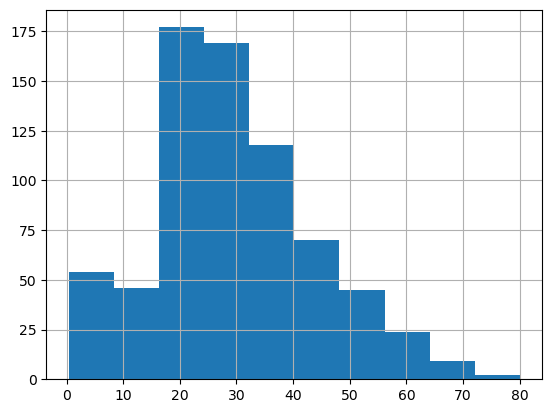

In [18]:
df['age'].hist()

<b> Взаимосвязь между полом и вживаемость </b>

In [19]:
# ('Выжил', 'Погиб')
survived = df['survived'] == 1
sex = pd.crosstab(df['sex'], survived)
sex

survived,False,True
sex,,
female,81,233
male,468,109


<b> Взаимосвязь между полом и классом проживания </b>

In [20]:
stoim = df['fare']
fare = pd.crosstab(df['class'], df['sex'])
fare

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


<b> Процентное соотношение пола к классу проживания </b>

In [21]:
pr_w_f = round((fare['male']['First'] / sum(fare['male']) * 100))
pr_w_f 

21

In [22]:
pclass = pd.crosstab(df['class'], survived)
# stat2 = pd.crosstab(df[])


In [23]:
pclass

survived,False,True
class,,
First,80,136
Second,97,87
Third,372,119


array([[<Axes: title={'center': 'False'}>,
        <Axes: title={'center': 'True'}>]], dtype=object)

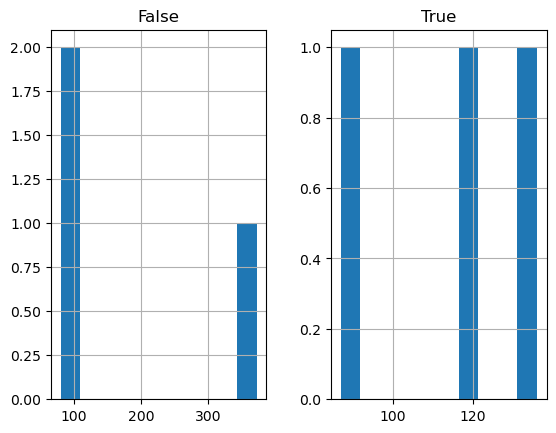

In [24]:
# pclass.hist()

<b> Выживание от стоимости </b>

In [25]:
fare = pd.crosstab(df['fare'], survived)
fare

survived,False,True
fare,,
0.0000,14,1
4.0125,1,0
5.0000,1,0
6.2375,1,0
6.4375,1,0
...,...,...
227.5250,1,3
247.5208,1,1
262.3750,0,2
